# Python Insights - Analisando Dados com Python

### Case - Cancelamento de Clientes

Você foi contratado por uma empresa com mais de 800 mil clientes para um projeto de Dados. Recentemente a empresa percebeu que da sua base total de clientes, a maioria são clientes inativos, ou seja, que já cancelaram o serviço.

Precisando melhorar seus resultados ela quer conseguir entender os principais motivos desses cancelamentos e quais as ações mais eficientes para reduzir esse número.

Base de dados e arquivos: https://drive.google.com/drive/folders/1uDesZePdkhiraJmiyeZ-w5tfc8XsNYFZ?usp=drive_link

In [31]:

import pandas as pd
import matplotlib.pyplot as plt



In [32]:
#passo 1: importar a base de dados
tabela = pd.read_csv('cancelamentos_sample.csv')
#passi 2: entender a base de dados


#informações inuteis
tabela = tabela.drop(columns='CustomerID')
display(tabela)




,idade,sexo,tempo_como_cliente,frequencia_uso,ligacoes_callcenter,dias_atraso,assinatura,duracao_contrato,total_gasto,meses_ultima_interacao,cancelou
0,23.0,Male,13.0,22.0,2.0,1.0,Standard,Annual,909.58,23.0,0.0
1,49.0,Male,55.0,16.0,3.0,6.0,Premium,Monthly,207.00,29.0,1.0
2,30.0,Male,7.0,1.0,0.0,8.0,Basic,Annual,768.78,7.0,0.0
3,26.0,Male,40.0,5.0,3.0,8.0,Premium,Annual,398.00,12.0,1.0
4,27.0,Female,17.0,30.0,5.0,6.0,Basic,Annual,507.00,15.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
49995,62.0,Female,35.0,7.0,2.0,8.0,Basic,Annual,232.00,15.0,1.0
49996,36.0,Male,43.0,21.0,2.0,30.0,Basic,Quarterly,928.00,30.0,1.0
49997,55.0,Male,42.0,8.0,1.0,12.0,Basic,Monthly,326.00,27.0,1.0
49998,40.0,Female,14.0,19.0,1.0,17.0,Premium,Quarterly,826.76,12.0,0.0


In [33]:
#passo 2: resolver problemas na base de dados
#informações em formato errado
#informações vazias

display(tabela.info())
tabela = tabela.dropna() #apagando linhas com informações vazias
display(tabela.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   idade                   50000 non-null  float64
 1   sexo                    49997 non-null  object 
 2   tempo_como_cliente      49998 non-null  float64
 3   frequencia_uso          50000 non-null  float64
 4   ligacoes_callcenter     50000 non-null  float64
 5   dias_atraso             50000 non-null  float64
 6   assinatura              50000 non-null  object 
 7   duracao_contrato        50000 non-null  object 
 8   total_gasto             50000 non-null  float64
 9   meses_ultima_interacao  50000 non-null  float64
 10  cancelou                50000 non-null  float64
dtypes: float64(8), object(3)
memory usage: 4.2+ MB


None

<class 'pandas.core.frame.DataFrame'>
Index: 49996 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   idade                   49996 non-null  float64
 1   sexo                    49996 non-null  object 
 2   tempo_como_cliente      49996 non-null  float64
 3   frequencia_uso          49996 non-null  float64
 4   ligacoes_callcenter     49996 non-null  float64
 5   dias_atraso             49996 non-null  float64
 6   assinatura              49996 non-null  object 
 7   duracao_contrato        49996 non-null  object 
 8   total_gasto             49996 non-null  float64
 9   meses_ultima_interacao  49996 non-null  float64
 10  cancelou                49996 non-null  float64
dtypes: float64(8), object(3)
memory usage: 4.6+ MB


None

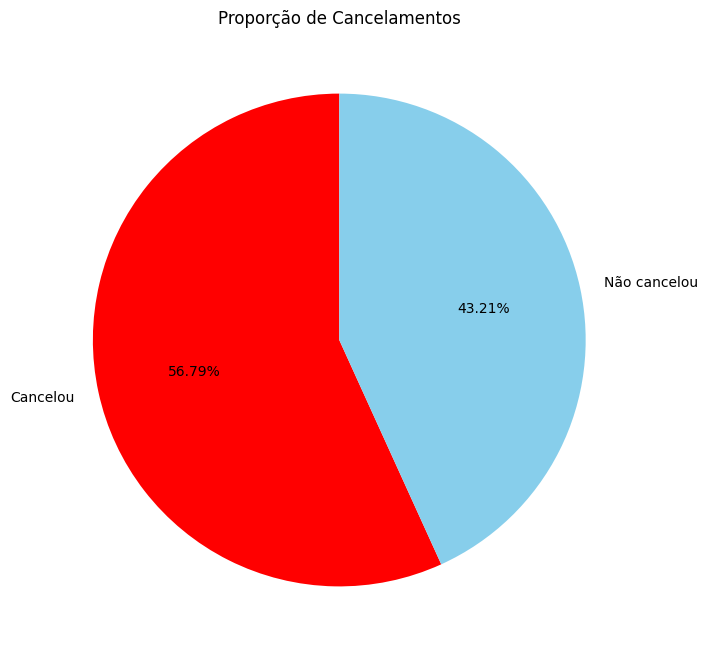

In [ ]:
# Conta quantos cancelaram e quantos não cancelaram
contagem = tabela["cancelou"].value_counts(normalize=True)

contagem.index = contagem.index.map({0: "Não cancelou", 1: "Cancelou"})

# Cria o gráfico de pizza
plt.figure(figsize=(8,8))
plt.pie(contagem, 
        labels=contagem.index,   # rótulos (ex: 0 = não cancelou, 1 = cancelou)
        autopct="%.2f%%",        # mostra porcentagem com 1 casa decimal
        startangle=90,           # começa o gráfico em 90 graus
        colors=["red", "skyblue"])  # cores personalizadas

plt.title("Proporção de Cancelamentos")
plt.show()

In [35]:
import pandas as pd
import plotly.express as px

# Mapeia rótulos bonitinhos
tabela["cancelou_legenda"] = tabela["cancelou"].map({0: "Não cancelou", 1: "Cancelou"})

for coluna in tabela.columns:
    if coluna in ["cancelou", "cancelou_legenda"]:  
        continue  # pula a própria coluna de status

    # 1) Contagem por categoria da coluna + cancelamento
    base = (
        tabela
        .groupby([coluna, "cancelou_legenda"])
        .size()
        .reset_index(name="qtde")
    )

    # 2) Calcula % dentro de cada categoria da coluna
    base["perc"] = base.groupby(coluna)["qtde"].transform(lambda s: s / s.sum() * 100)

    # 3) Gráfico em barras (lado a lado mostrando %)
    grafico = px.bar(
        base,
        x=coluna,
        y="perc",
        color="cancelou_legenda",
        barmode="group",
        text="perc",
        labels={coluna: coluna, "perc": "% dentro da categoria", "cancelou_legenda": "Situação"},
        color_discrete_map={"Cancelou": "red", "Não cancelou": "blue"},
        title=f"Cancelamentos por {coluna} (%)"
    )

    grafico.update_traces(texttemplate="%{text:.1f}%")
    grafico.update_yaxes(range=[0, 100], title="% dentro da categoria")
    grafico.show()


,idade,sexo,tempo_como_cliente,frequencia_uso,ligacoes_callcenter,dias_atraso,assinatura,duracao_contrato,total_gasto,meses_ultima_interacao,cancelou,cancelou_legenda
0,23.0,Male,13.0,22.0,2.0,1.0,Standard,Annual,909.58,23.0,0.0,Não cancelou
2,30.0,Male,7.0,1.0,0.0,8.0,Basic,Annual,768.78,7.0,0.0,Não cancelou
3,26.0,Male,40.0,5.0,3.0,8.0,Premium,Annual,398.00,12.0,1.0,Cancelou
6,49.0,Male,6.0,7.0,0.0,0.0,Standard,Annual,751.00,11.0,0.0,Não cancelou
7,33.0,Male,15.0,18.0,1.0,20.0,Standard,Annual,839.71,25.0,0.0,Não cancelou
...,...,...,...,...,...,...,...,...,...,...,...,...
49991,24.0,Female,33.0,28.0,1.0,11.0,Premium,Annual,844.05,9.0,0.0,Não cancelou
49992,37.0,Male,46.0,29.0,2.0,9.0,Standard,Quarterly,517.86,3.0,0.0,Não cancelou
49994,63.0,Male,16.0,24.0,2.0,18.0,Standard,Quarterly,442.00,26.0,1.0,Cancelou
49995,62.0,Female,35.0,7.0,2.0,8.0,Basic,Annual,232.00,15.0,1.0,Cancelou


cancelou
Não cancelou    0.816462
Cancelou        0.183538
Name: proportion, dtype: float64

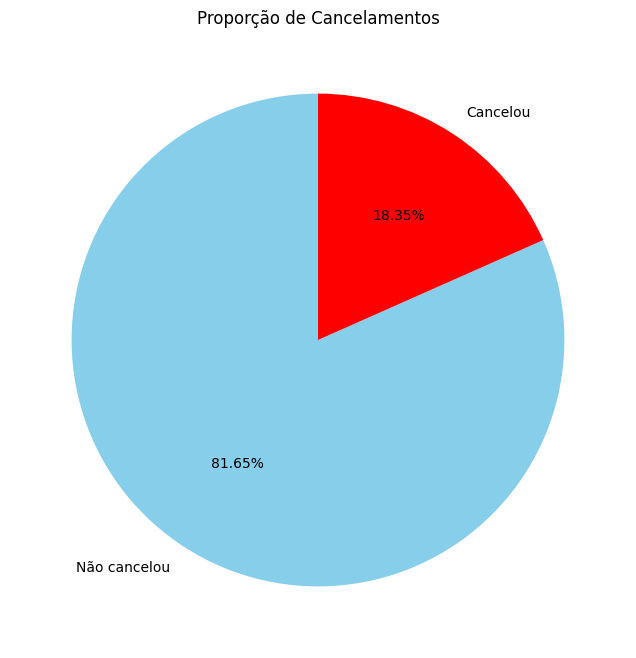

In [45]:
tabela = tabela[tabela["duracao_contrato"]!="Monthly"]
tabela = tabela[tabela["ligacoes_callcenter"]<=4]
tabela = tabela[tabela["dias_atraso"]<=20]

contagem = tabela["cancelou"].value_counts(normalize=True)
contagem.index = contagem.index.map({0: "Não cancelou", 1: "Cancelou"})

display(tabela)
display(contagem)

plt.figure(figsize=(8,8))
plt.pie(contagem, 
        labels=contagem.index,   # rótulos (ex: 0 = não cancelou, 1 = cancelou)
        autopct="%.2f%%",        # mostra porcentagem com 1 casa decimal
        startangle=90,           # começa o gráfico em 90 graus
        colors=["skyblue", "red"])  # cores personalizadas

plt.title("Proporção de Cancelamentos")
plt.show()